In [1]:
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from collections import Counter 
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

In [2]:
#Carregando o dataset COVID19BR
dados = pd.read_csv('dataset_shuffle.csv') #all_tokens
dados.head()

,Unnamed: 0,ID,fake_news,text,author,average_word_length,category,date_publication,link,percent_speeling_errors
0,669,670,1,Internauta filma homem flutuando entre raios. ...,None,4.38971,tv_celebridades,02/10/2017,https://www.diariodobrasil.org/internauta-film...,0.382353
1,4269,670,0,"Nós cometemos erros, diz Mark Zuckerberg sobre...",Por G1,4.97788,tv_celebridades,21/03/2018 16h48,https://g1.globo.com/economia/tecnologia/notic...,0.231151
2,786,788,1,Brasileiro (que mora nos EUA) compara Miami co...,None,5.35000,tv_celebridades,12/09/2017,https://www.diariodobrasil.org/brasileiro-que-...,0.100000
3,1889,1892,1,Mídia internacional destaca o vidente Carlinho...,None,4.48521,sociedade_cotidiano,29/11/2016,https://www.diariodobrasil.org/midia-internaci...,0.088757
4,3225,3228,1,FIOCRUZ alerta que vírus zika pode ser transmi...,None,4.83333,politica,06/02/2016,https://www.diariodobrasil.org/fiocruz-alerta-...,0.083333


In [3]:
# dados = pd.read_csv('COVID19BR/covidbr_labeled.csv') #all_tokens
total = dados['text']
fake = dados[dados['fake_news']==1]['text']
real = dados[dados['fake_news']==0]['text']

In [4]:
stop_por = set(stopwords.words("portuguese"))
def limpa_texto(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    text = re.sub('&amp',' ', text)
    text = re.sub(" \d+", " ", text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.split()
    text = [w for w in text if not w in stop_por]
    text = " ".join(text)
    return text

In [5]:
total = total.map(lambda x: limpa_texto(x))
fake = fake.map(lambda x: limpa_texto(x))
real = real.map(lambda x: limpa_texto(x))
total.head()

0    internauta filma homem flutuando raios vídeo v...
1    cometemos erros diz mark zuckerberg sobre escâ...
2    brasileiro mora eua compara miami rio janeiro ...
3    mídia internacional destaca vidente carlinhos ...
4    fiocruz alerta vírus zika pode transmitido sal...
Name: text, dtype: object

In [6]:
def concatena_todas_sentencas(sentencas):
    all_tokens = ''
    for text in sentencas:
        tx = str(text).lower().strip()
        tx = " ".join(tx.split())
        all_tokens += tx + " "
    return all_tokens

In [7]:
all_tokens = concatena_todas_sentencas(total)   
fake_tokens = concatena_todas_sentencas(fake)   
real_tokens = concatena_todas_sentencas(real)   
# fake_tokens

In [8]:
stop_por = set(stopwords.words("portuguese"))
palavras_parada = list(stop_por)

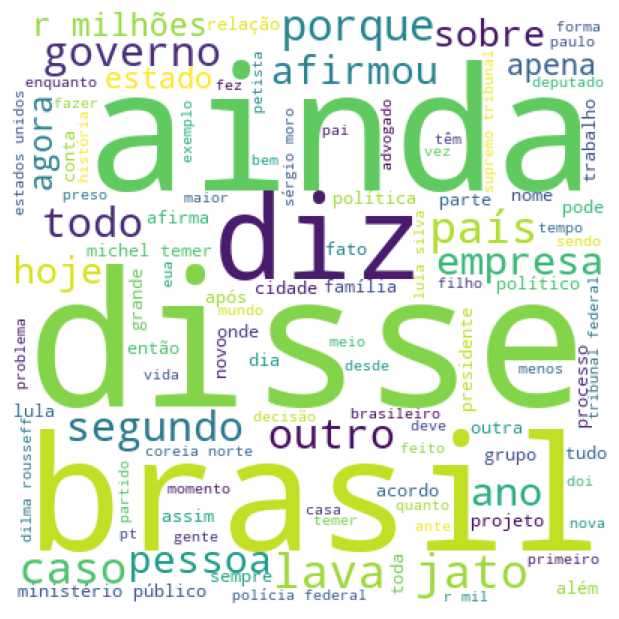

In [9]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = palavras_parada, 
            min_font_size = 10).generate(all_tokens) 
                      
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


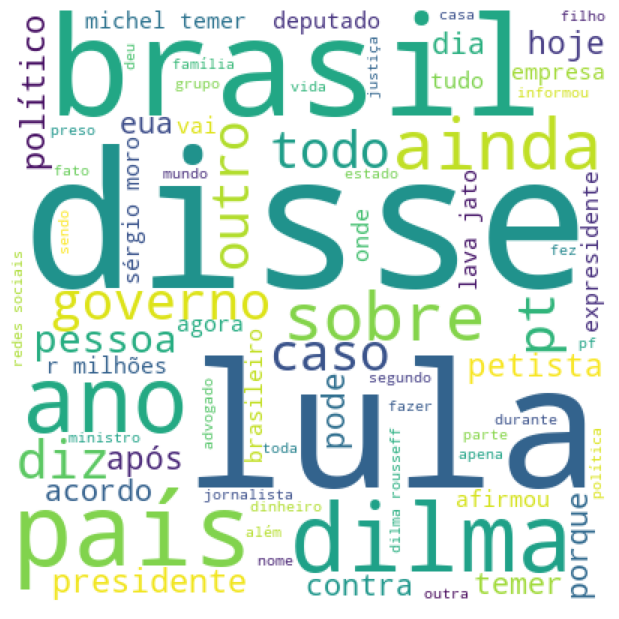

In [10]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = palavras_parada, 
            min_font_size = 10).generate(fake_tokens) 
                      
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

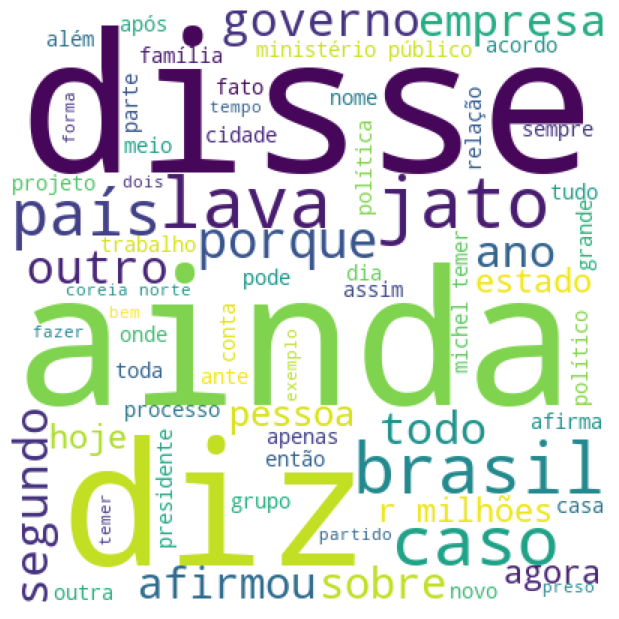

In [11]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = palavras_parada, 
            min_font_size = 10).generate(real_tokens) 
                      
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [17]:
stoplist = set(stopwords.words("portuguese"))
stoplist.add("r")
all_tokens_words = [w for w in all_tokens.split() if w not in stoplist]
fake_tokens_words = [w for w in fake_tokens.split() if w not in stoplist]
real_tokens_words = [w for w in real_tokens.split() if w not in stoplist]

In [ ]:
fake_tokens_words

In [18]:
Counter(all_tokens_words).most_common(20)

[('lula', 11849),
 ('presidente', 10581),
 ('disse', 10383),
 ('sobre', 9432),
 ('anos', 9282),
 ('federal', 8832),
 ('governo', 8024),
 ('ainda', 7986),
 ('segundo', 7246),
 ('brasil', 7134),
 ('temer', 6880),
 ('ter', 6417),
 ('diz', 6237),
 ('país', 5990),
 ('contra', 5927),
 ('expresidente', 5896),
 ('pessoas', 5547),
 ('dia', 5453),
 ('vai', 5350),
 ('pode', 5294)]

In [19]:
Counter(fake_tokens_words).most_common(20)

[('lula', 3055),
 ('disse', 2200),
 ('dilma', 1863),
 ('presidente', 1844),
 ('brasil', 1413),
 ('país', 1234),
 ('governo', 1195),
 ('temer', 1183),
 ('federal', 1177),
 ('sobre', 1130),
 ('anos', 1095),
 ('expresidente', 1087),
 ('ainda', 954),
 ('contra', 930),
 ('ministro', 895),
 ('vai', 893),
 ('acordo', 892),
 ('durante', 857),
 ('pode', 852),
 ('pt', 848)]

In [20]:
Counter(real_tokens_words).most_common(20)

[('lula', 8794),
 ('presidente', 8737),
 ('sobre', 8302),
 ('anos', 8187),
 ('disse', 8183),
 ('federal', 7655),
 ('ainda', 7032),
 ('governo', 6829),
 ('segundo', 6782),
 ('brasil', 5721),
 ('temer', 5697),
 ('ter', 5635),
 ('diz', 5466),
 ('contra', 4997),
 ('pessoas', 4840),
 ('expresidente', 4809),
 ('país', 4756),
 ('ano', 4741),
 ('dia', 4724),
 ('vai', 4457)]